# DNN_UnderSampling_SMOTE

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_781b004b54474bea30ee7e26faffc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_781b004b54474bea30ee7e26faffc.get_object(Bucket='creditcardfrauddetection-donotdelete-pr-0xghpiixlza7mj',Key='creditcard.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
np.random.seed(2)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

## Split Data

In [4]:
df = df.drop(['Amount','Time'], axis = 1)
Y = df['Class']
X = df.drop(['Class'],axis = 1)

In [5]:
Y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Converting Data

In [7]:
train_identity = X_train.index
test_identity = X_test.index

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# DNN

In [9]:
#model creation with 6 layers
model = Sequential()
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
model.add(Dense(units = 24, activation = 'relu'))
#Droput Layer
model.add(Dropout(0.5))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 24, activation = 'relu'))
#output_layer
model.add(Dense(units = 1, activation = 'sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 15, epochs =5)

Epoch 1/5
15190/15190 [==============================] - 32s 2ms/step - loss: 0.0245 - accuracy: 0.9948
Epoch 2/5
15190/15190 [==============================] - 30s 2ms/step - loss: 0.0044 - accuracy: 0.9993
Epoch 3/5
15190/15190 [==============================] - 32s 2ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 4/5
15190/15190 [==============================] - 32s 2ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/5
15190/15190 [==============================] - 32s 2ms/step - loss: 0.0039 - accuracy: 0.9992


In [12]:
## Evaluating score
score = model.evaluate(X_test, Y_test)
print(score)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0030 - accuracy: 0.9994
[0.0030068783089518547, 0.9993504285812378]


In [16]:
y_pred = model.predict(X_test)

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
cm = confusion_matrix(Y_test, y_pred.round())
print(cm)

[[56844    17]
 [   20    81]]


Confusion matrix, without normalization


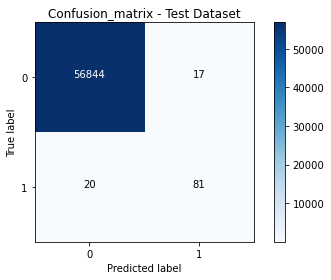

In [19]:
plot_confusion_matrix(cm, classes = [0,1], title = 'Confusion_matrix - Test Dataset')

In [20]:
print(accuracy_score(Y_test, y_pred.round()))
print(precision_score(Y_test, y_pred.round()))
print(recall_score(Y_test, y_pred.round()))
print(f1_score(Y_test, y_pred.round()))

0.9993504441557529
0.826530612244898
0.801980198019802
0.814070351758794


In [21]:
#sampling is performed before data spliting which should be the case if future data is unbalanced, otherwise, sampling needs to be performed only on train set. 

## Undersampling

In [22]:
fraud_ind = np.array(df[df.Class == 1].index)
num_frauds = len(fraud_ind)
print(num_frauds)
normal_ind = np.array(df[df.Class == 0].index)
num_normal = len(normal_ind)
print(num_normal)

492
284315


In [23]:
normal_ind = df[df.Class == 0].index
random_normal_ind = np.random.choice(normal_ind, num_frauds, replace = False)
random_normal_ind = np.array(random_normal_ind)

In [24]:
under_sample_ind = np.concatenate([fraud_ind, random_normal_ind])

In [25]:
print(len(under_sample_ind))

984


In [26]:
under_sample_data = df.iloc[under_sample_ind, :]

In [29]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
Y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, Y_undersample, test_size = 0.3)

In [31]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Model test

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [33]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
46/46 [==============================] - 1s 3ms/step - loss: 0.7255 - accuracy: 0.8545
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9245
Epoch 3/5
46/46 [==============================] - 0s 4ms/step - loss: 0.1605 - accuracy: 0.9318
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9497
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9462


In [34]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


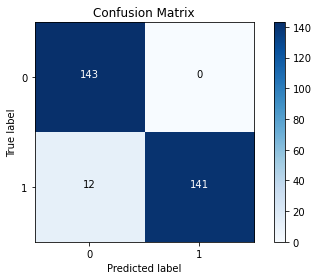

In [36]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0,1))
plt.show()

In [37]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9594594594594594
1.0
0.9215686274509803
0.9591836734693878


## Synthetic Minority Oversampling Technique

### Model Test

In [39]:
X_resample, y_resample = SMOTE().fit_sample(X,Y)

In [40]:
X_resample.shape

(568630, 29)

In [41]:
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [43]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
26537/26537 [==============================] - 56s 2ms/step - loss: 0.0486 - accuracy: 0.9833
Epoch 2/5
26537/26537 [==============================] - 56s 2ms/step - loss: 0.0146 - accuracy: 0.9960
Epoch 3/5
26537/26537 [==============================] - 53s 2ms/step - loss: 0.0107 - accuracy: 0.9971
Epoch 4/5
26537/26537 [==============================] - 52s 2ms/step - loss: 0.0092 - accuracy: 0.9977
Epoch 5/5
26537/26537 [==============================] - 52s 2ms/step - loss: 0.0085 - accuracy: 0.9979


In [47]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


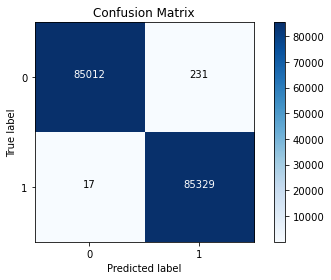

In [48]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [49]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9985462134135261
0.9973001402524544
0.9998008108171443
0.9985489099270944
